In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # 注意这里新增了numpy引用

# 加载数据
df_HK = pd.read_csv('HK_result.csv')
df_XJ = pd.read_csv('XJ_result.csv')
df_JB = pd.read_csv('JB_result.csv')

# 添加主题标签
df_HK['Topic'] = 'Hong Kong Protests'
df_XJ['Topic'] = 'Xinjiang Counter-terrorism'
df_JB['Topic'] = 'China Progress'

# 合并数据用于整体分析
df_combined = pd.concat([df_HK, df_XJ, df_JB], ignore_index=True)

# 查看数据概况
print(df_combined.head())
print(df_combined.info())


   Certification      View  Comment_num            Date    Name      Fans  \
0              4   1368000        37000   (2020, 5, 18)   共青团中央  11416573   
1              4  12414000       295000  (2019, 11, 20)   共青团中央  11416573   
2              5   1632000         8230  (2019, 11, 27)    央视新闻  20926839   
3              1   3479000        22000   (2021, 4, 30)   毒舌的南瓜   2299715   
4              2   2255000        16000   (2021, 4, 22)  卢克文工作室   4368332   

                                     Comment_details               Topic  
0  [['这个不是电影，我亲眼目睹过', 10, ['69.17000', '5', '25',...  Hong Kong Protests  
1  [['杨永信：该轮到我发挥真正作用了吗', 10, ['136.72200', '1', '...  Hong Kong Protests  
2  [['都是一国同胞何苦呢？', 10, ['120.10800', '1', '25', '...  Hong Kong Protests  
3  [['警惕娱乐圈！', 10, ['235.03900', '5', '25', '1670...  Hong Kong Protests  
4  [['《冥主派》', 10, ['18.06500', '1', '25', '167772...  Hong Kong Protests  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (t

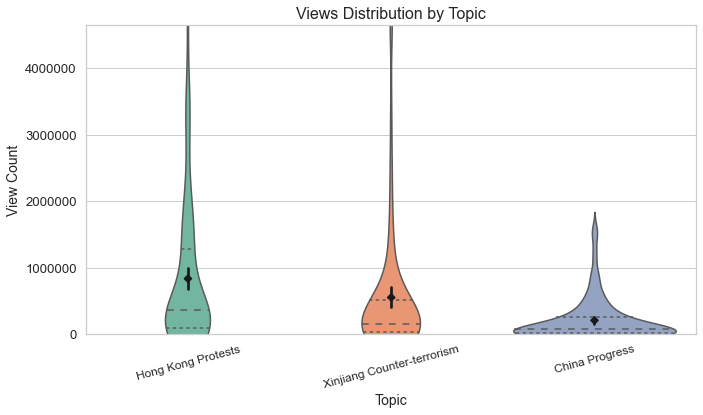

In [10]:
# 转换播放量为数字类型
df_combined['View'] = pd.to_numeric(df_combined['View'], errors='coerce')

# 过滤掉极端异常值以优化显示效果
df_filtered = df_combined[df_combined['View'] < df_combined['View'].quantile(0.99)]

# 设置画布大小
plt.figure(figsize=(10, 6))

# 绘制Violin图
palette = sns.color_palette("Set2", 3)
sns.violinplot(x='Topic', y='View', data=df_filtered, palette=palette, inner="quartile")

# 添加平均值
sns.pointplot(x='Topic', y='View', data=df_filtered, estimator=np.mean,
              color='k', markers='D', linestyles='', scale=0.75)

# 设置图标题和轴标签
plt.title('Views Distribution by Topic', fontsize=16)
plt.xlabel('Topic', fontsize=14)
plt.ylabel('View Count', fontsize=14)
plt.xticks(rotation=15, fontsize=12)

# 调整Y轴范围，使图表底部不再拥挤
plt.ylim(bottom=0, top=df_filtered['View'].quantile(0.99))

# 格式化Y轴刻度，避免科学计数法
plt.ticklabel_format(style='plain', axis='y')

# 保存图片到本地
plt.tight_layout()
plt.savefig('views_distribution_by_topic.png', dpi=300)

# 展示图表
plt.show()

In [11]:
df_combined['View'] = pd.to_numeric(df_combined['View'], errors='coerce')
df_combined['Comment_num'] = pd.to_numeric(df_combined['Comment_num'], errors='coerce')

# 按Topic分组并计算统计数据
summary_stats = df_combined.groupby('Topic').agg(
    Total_Views=('View', 'sum'),
    Mean_Views=('View', 'mean'),
    Max_Views=('View', 'max'),
    Variance_Views=('View', 'var'),
    Total_Comments=('Comment_num', 'sum'),
    Mean_Comments=('Comment_num', 'mean'),
    Max_Comments=('Comment_num', 'max'),
    Variance_Comments=('Comment_num', 'var')
).reset_index()

# 输出结果
print(summary_stats)

                        Topic  Total_Views    Mean_Views  Max_Views  \
0              China Progress     37020268  2.103424e+05    1614000   
1          Hong Kong Protests    188681187  1.019898e+06   12414000   
2  Xinjiang Counter-terrorism    129509721  7.194984e+05   24115000   

   Variance_Views  Total_Comments  Mean_Comments  Max_Comments  \
0    1.025659e+11          211802    1203.420455         39000   
1    2.740118e+12         1164775    6296.081081        295000   
2    4.302703e+12          615176    3417.644444        197000   

   Variance_Comments  
0       1.765793e+07  
1       5.550136e+08  
2       2.667287e+08  


In [12]:
# 每个Topic的采集视频条数
video_counts = df_combined['Topic'].value_counts()

# 显示结果
print(video_counts)


Topic
Hong Kong Protests            185
Xinjiang Counter-terrorism    180
China Progress                176
Name: count, dtype: int64


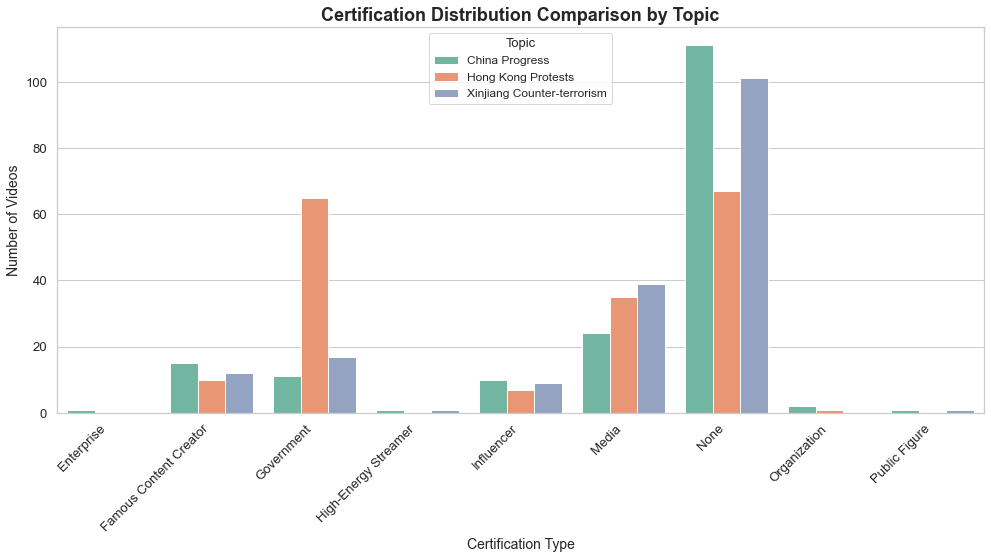

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Certification对应清晰的标签映射
certification_labels = {
    0: 'None',
    1: 'Famous Content Creator',
    2: 'Influencer',
    3: 'Enterprise',
    4: 'Government',
    5: 'Media',
    6: 'Organization',
    7: 'High-Energy Streamer',
    8: 'Unknown',
    9: 'Public Figure'
}

# 替换Certification数字为清晰标签
df_combined['Certification_Label'] = df_combined['Certification'].map(certification_labels)

# 统计各个Topic下不同Certification类型的数量
certification_distribution = df_combined.groupby(['Topic', 'Certification_Label']).size().reset_index(name='Counts')

# 绘图
plt.figure(figsize=(14, 8))
sns.barplot(data=certification_distribution, 
            x='Certification_Label', 
            y='Counts', 
            hue='Topic',
            palette='Set2')

# 图表标题与轴标签
plt.title('Certification Distribution Comparison by Topic', fontsize=18, fontweight='bold')
plt.xlabel('Certification Type', fontsize=14)
plt.ylabel('Number of Videos', fontsize=14)
plt.xticks(rotation=45, ha='right')

# 图例设置
plt.legend(title='Topic', fontsize=12, title_fontsize=13)

# 调整布局
plt.tight_layout()

# 保存图片
plt.savefig('certification_distribution_comparison.png', dpi=300)

plt.show()



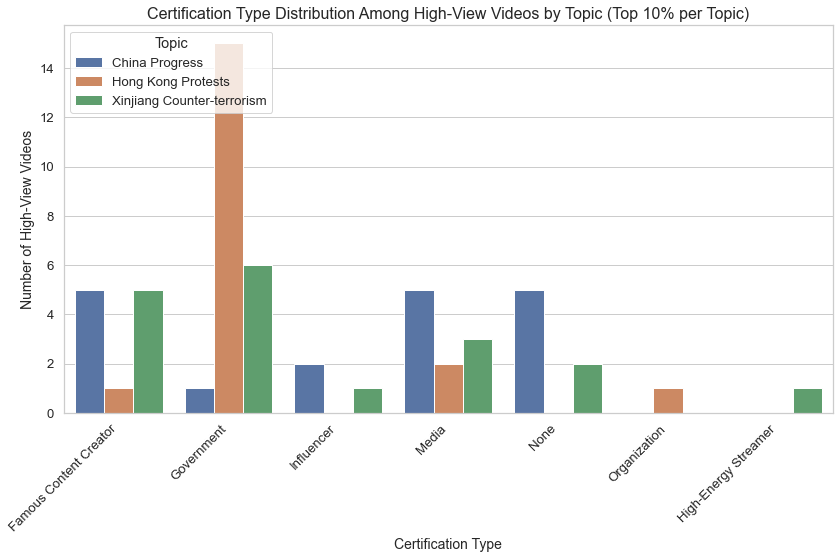

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 每个主题单独定义高播放量（前10%）
high_views_videos = pd.DataFrame()

for topic in df_combined['Topic'].unique():
    topic_df = df_combined[df_combined['Topic'] == topic]
    high_views_threshold = topic_df['View'].quantile(0.9)
    high_views_topic_df = topic_df[topic_df['View'] >= high_views_threshold]
    high_views_videos = pd.concat([high_views_videos, high_views_topic_df])

# Certification type映射
certification_mapping = {
    0: 'None',
    1: 'Famous Content Creator',
    2: 'Influencer',
    3: 'Enterprise',
    4: 'Government',
    5: 'Media',
    6: 'Organization',
    7: 'High-Energy Streamer',
    8: 'Unknown',
    9: 'Public Figure'
}

high_views_videos['Certification_Label'] = high_views_videos['Certification'].map(certification_mapping)

# 聚合数据
cert_high_view = high_views_videos.groupby(['Topic', 'Certification_Label']).size().reset_index(name='High_View_Count')

# 可视化
plt.figure(figsize=(12, 8))
sns.barplot(data=cert_high_view, x='Certification_Label', y='High_View_Count', hue='Topic')
plt.xticks(rotation=45, ha='right')
plt.title('Certification Type Distribution Among High-View Videos by Topic (Top 10% per Topic)', fontsize=16)
plt.xlabel('Certification Type', fontsize=14)
plt.ylabel('Number of High-View Videos', fontsize=14)
plt.tight_layout()

# 保存图片到本地
plt.savefig('high_views_certification_distribution_per_topic.png')
plt.show()
